## Aufgabe (1)

In [62]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

### Daten einlesen

In [63]:
with open("../Daten/pagerank1.txt", "r") as file:
    data = [line.rstrip() for line in file]

nodes = data[0].split(';')
edges = data[1].split(';')

### Konstanten definieren

In [64]:
N = 150  # Anzahl der Schritte
eta = 0.9  # Teleporting Wahrscheinlichkeit

### Graphen erstellen

In [65]:
G = nx.DiGraph()

for node in nodes:
    G.add_node(node)

for idx, edge in enumerate(edges):
    from_node = nodes[idx]
    if edge:
        to_nodes = edge.split(',')
        for to_node in to_nodes:
            G.add_edge(from_node, to_node)
    else:
        G.add_edge(from_node, from_node)

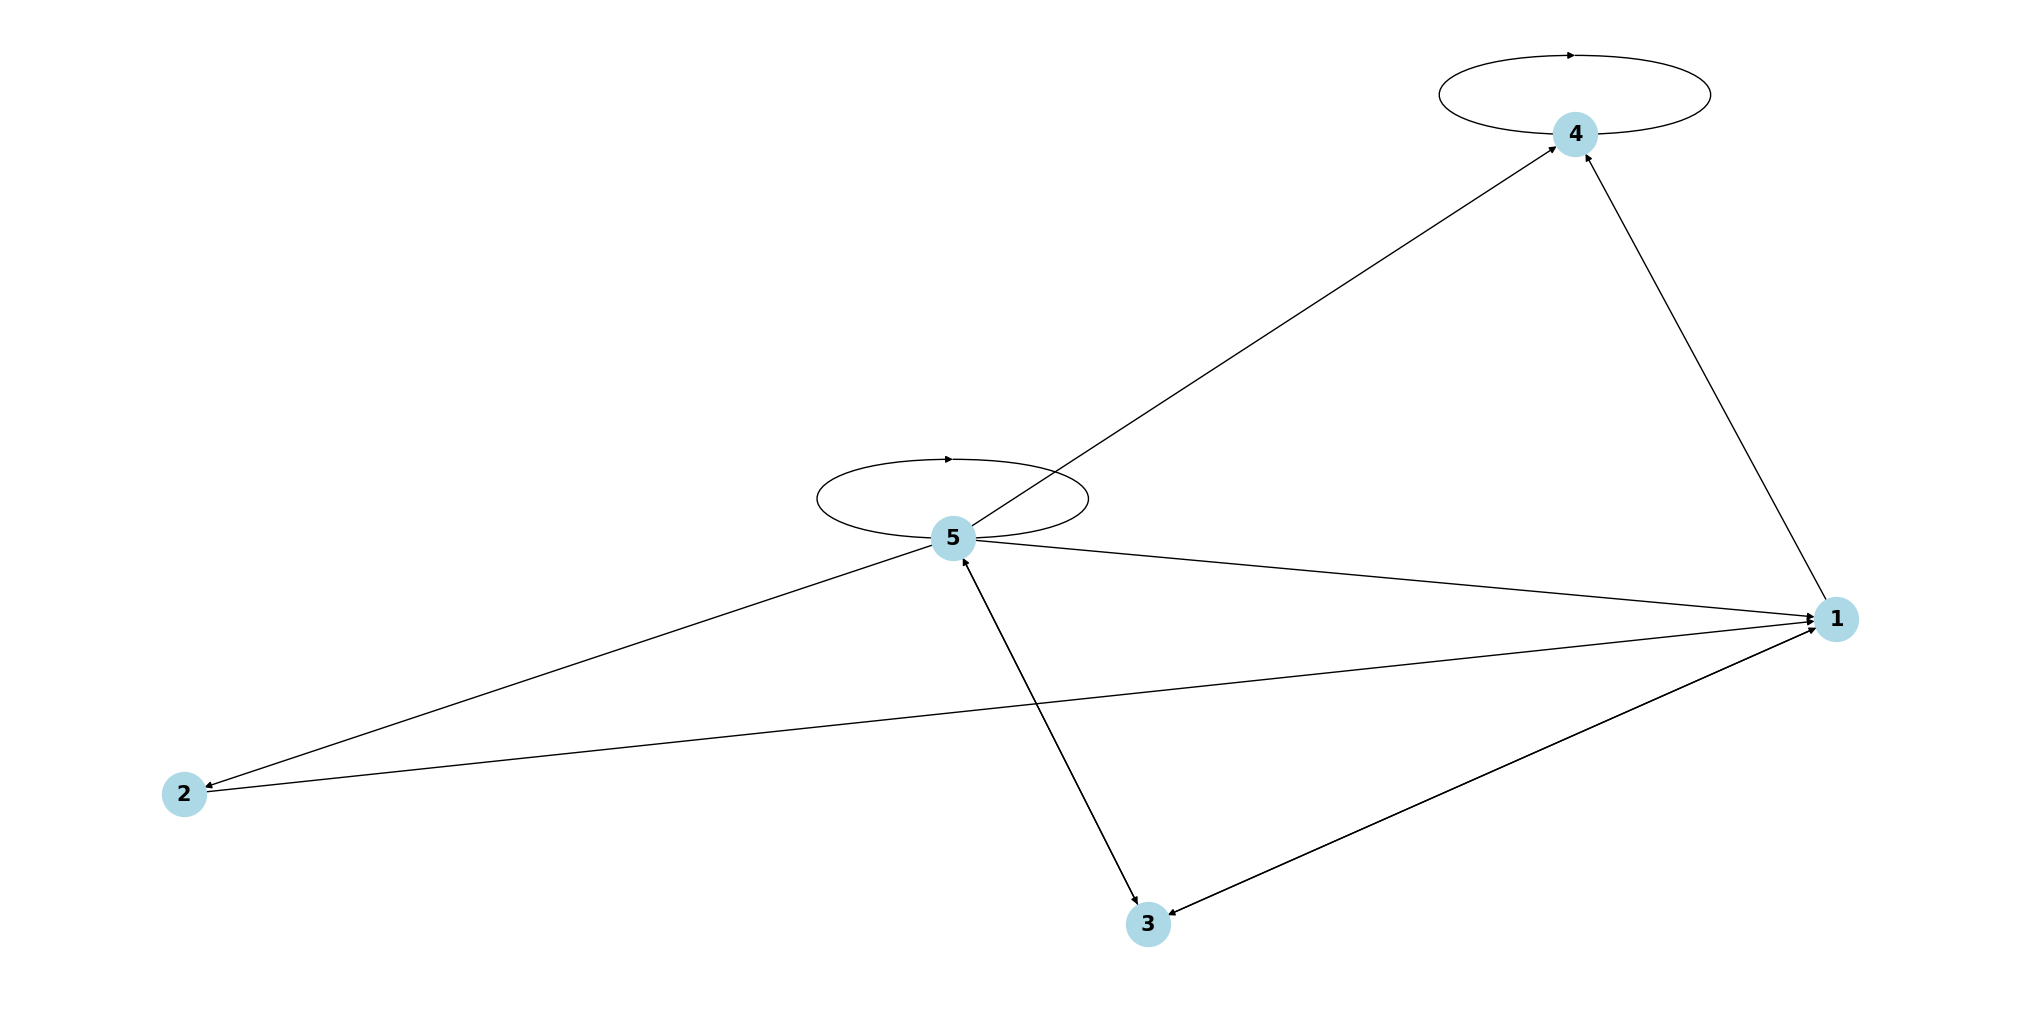

In [66]:
plt.figure(figsize=(20, 10))
nx.draw(G, with_labels=True, node_color='lightblue', 
        node_size=1000, font_size=15, font_weight='bold',
        arrows=True)
plt.show()

### Adjazenzmatrix A und Übergangsmatrix P

In [67]:
A = nx.adjacency_matrix(G, nodelist=nodes).toarray()
P = A / A.sum(axis=1, keepdims=True)

### Gleichverteilung und Startverteilung definieren

In [68]:
n = len(nodes)
p0 = np.full((n,), 1/n)

### Verteilung nach N Schritten ohne Teleporting

In [69]:
p = p0
for _ in range(N):
    p = p @ P
    
verteilung_ohne_teleporting = np.argsort(-p)
nodes_liste = np.array(nodes)
verteilung_ohne_teleporting = nodes_liste[verteilung_ohne_teleporting]
print(verteilung_ohne_teleporting)

['4' '1' '3' '5' '2']


### Verteilung nach N Schritten mit Teleporting

In [70]:
E = np.full((n, n), 1/n)

P_tele0 = eta * P + (1 - eta) * E

p_teleport = p0
for _ in range(N):
    p_teleport = p_teleport @ P_tele0
    
verteilung_mit_teleporting = np.argsort(-p_teleport)
verteilung_mit_teleporting = nodes_liste[verteilung_mit_teleporting]
print(verteilung_mit_teleporting)

['4' '1' '3' '5' '2']
